In [ ]:
from utils_get_win_chance import get_win_chance

In [4]:
import cv2
import numpy as np

In [6]:
import pytesseract

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'D:\Applications\Tesseract-OCR\tesseract.exe'

In [2]:
from utils_global import imread_grayscale
from utils_detect_attack_mode import is_attack_mode
from utils_get_win_chance import get_win_chance, setup_pytesseract

In [3]:
img = imread_grayscale(image_path="pics/attack_mode/attack_01.jpg")

In [11]:
import matplotlib.pyplot as plt

In [31]:
def get_win_chance_pic(img : cv2.typing.MatLike):
    h, w = img.shape
    top_y = int(h * 0.07)
    bottom_y = int(h * 0.125)
    left_x = int(w * 0.45) 
    right_x = int(w * 0.55) 
    return img[top_y:bottom_y, left_x:right_x]

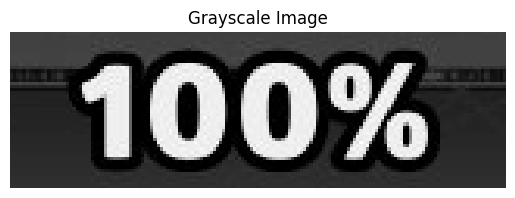

In [36]:
crop = get_win_chance_pic(img)

plt.imshow(crop, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [34]:
text : str = pytesseract.image_to_string(crop, config='--psm 6')

In [40]:
text = int("".join([char for char in text if char.isdigit()]))

In [41]:
text

100

In [42]:
def get_win_chance(gray_screen: cv2.typing.MatLike) -> int:
    try:
        crop = get_win_chance_pic(gray_screen)
        text : str = pytesseract.image_to_string(crop, config='--psm 6')
        return int("".join([char for char in text if char.isdigit()]))
    except Exception as e:
        print(e)
        return -1